In [54]:
import pandas as pd
import src.scripts as src
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# import raw_PartD
raw_PartD = src.read_from_efs('raw_PartD.csv')

# import excluded_npi_list
excluded_npi_list = src.read_from_efs('excluded_npi_list.csv')

# group by state and npi
df_state_npi = raw_PartD.groupby(['nppes_provider_state','npi']).agg('sum').reset_index()

# drop year column
df_state_npi.drop('year', axis=1, inplace=True)

# add label
df_state_npi['label'] = df_state_npi['npi'].isin(excluded_npi_list['NPI'])

# save to efs
src.save_to_efs(df_state_npi, 'df_state_npi.csv')

In [21]:
df_state_npi.tail() 

,nppes_provider_state,npi,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,label
1120562,ZZ,1972809879,0.0,11,11.0,78,171.54,0.0,11.0,11.0,78.0,171.54,False
1120563,ZZ,1982685947,26.0,54,54.0,625,314.61,0.0,0.0,0.0,0.0,0.00,False
1120564,ZZ,1982734109,984.0,10361,10752.0,306996,1498686.86,61.0,5541.0,5796.5,166535.0,828515.51,False
1120565,ZZ,1992121776,0.0,140,196.4,5663,11352.01,0.0,0.0,0.0,0.0,0.00,False
1120566,ZZ,1992780407,114.0,490,854.2,23293,62124.83,0.0,144.0,333.7,9538.0,21327.83,False


In [41]:
# group count NPI's by state
npi_count_by_state = df_state_npi[['nppes_provider_state', 'npi']].groupby('nppes_provider_state').agg('count')

# count exclusions by state
exclusion_count_by_state = df_state_npi[['nppes_provider_state', 'label']].groupby('nppes_provider_state').agg('sum')

# merge on state
state_trgt = npi_count_by_state.merge(exclusion_count_by_state, left_index=True, right_index=True)

# add exclusion ratio
state_trgt['ratio'] = state_trgt['label']/state_trgt['npi']

# sort by exclusion ratio
state_trgt.sort_values(by='ratio', ascending=False, inplace=True)

In [45]:
state_trgt.head()

,npi,label,ratio
nppes_provider_state,,,
VI,194,1.0,0.005155
WV,7657,19.0,0.002481
AL,13869,26.0,0.001875
NV,7486,14.0,0.001870
UT,8252,15.0,0.001818


In [51]:
# Build `state_ratio_df` with cummulatives
state_ratio_df = pd.DataFrame()
state_ratio_df['cumm_provider_cnt'] = state_trgt['npi'].cumsum()
state_ratio_df['cumm_exclusion_cnt'] = state_trgt['label'].cumsum()
state_ratio_df['exclusion_ratio'] = state_ratio_df['cumm_exclusion_cnt']/state_ratio_df['cumm_provider_cnt']

In [52]:
state_ratio_df.head()

,cumm_provider_cnt,cumm_exclusion_cnt,exclusion_ratio
nppes_provider_state,,,
VI,194,1.0,0.005155
WV,7851,20.0,0.002547
AL,21720,46.0,0.002118
NV,29206,60.0,0.002054
UT,37458,75.0,0.002002


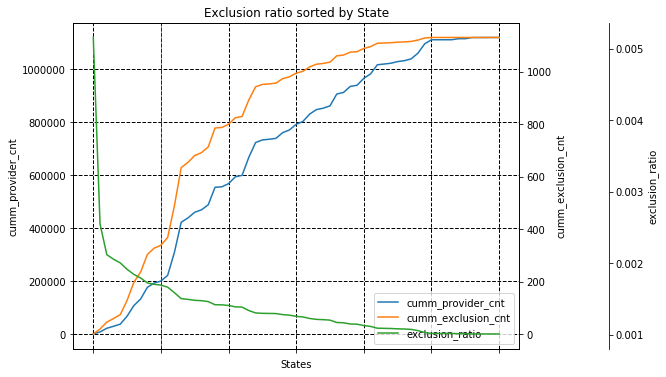

In [57]:
# Plot sorted cumulative chart by Exclusion Ratio
threshold_value=10
src.plot_multi(state_ratio_df, threshold_value, 'States', spacing=.2, figsize=(8,6), title='Exclusion ratio sorted by State')
plt.show()

In [59]:
print('Top {} State by Exclusion Ration: {}'.format(threshold_value, state_ratio_df.index.tolist()[:10]))

Top 10 State by Exclusion Ration: ['VI', 'WV', 'AL', 'NV', 'UT', 'NJ', 'MI', 'TN', 'IL', 'KY']
